# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns

## load the data sets

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

                   country  counts
0                    Spain     646
1                 Portugal     256
2                  Germany     225
3           Czech Republic     130
4                   Poland     104
5                   Turkey      94
6                   Greece      82
7               Montenegro      51
8        Macedonia (FYROM)      34
9                  Croatia      30
10                  Kosovo      30
11                 Albania      29
12  Bosnia and Herzegovina      26
13                  Serbia      15
14          United Kingdom       7


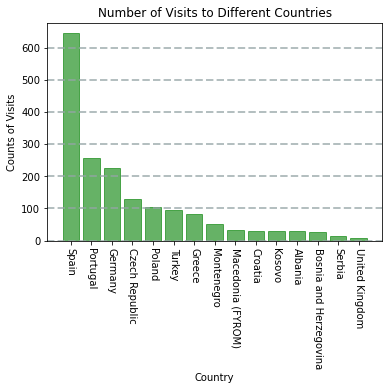

In [5]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim


country = df.country.value_counts().rename_axis('country').reset_index(name='counts')
print(country)
x = country['country']
y = country['counts']
plt.bar(x, y, color='green', alpha=.6, edgecolor='g')

plt.xlabel("Country")
plt.ylabel("Counts of Visits")
plt.title("Number of Visits to Different Countries")

plt.xticks(rotation = -90)

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

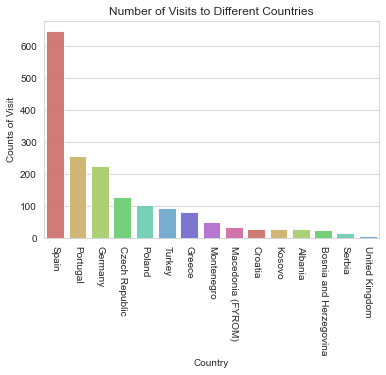

In [6]:
sns.set_style("whitegrid")
ax = sns.barplot(x="country", y="counts", data=country, palette=sns.color_palette("hls", 9),alpha=0.9)
ax.set_title("Number of Visits to Different Countries")
ax.set_ylabel('Counts of Visit')
ax.set_xlabel('Country')

for item in ax.get_xticklabels():
    item.set_rotation(-90)

,counts
country,
Spain,646
Portugal,256
Germany,225


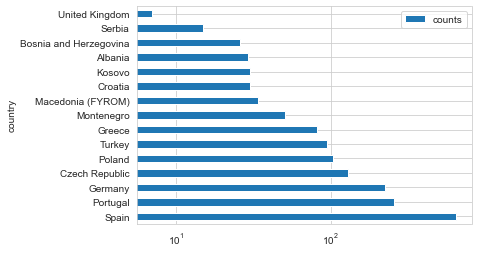

In [7]:
# test data, loads a pandas dataframe
#df1 = sns.load_dataset('country')
df1 = df.country.value_counts().rename_axis('country').to_frame('counts')
display(df1.head(3))

# plot value_counts of Series
ax = df1.plot(kind='barh')

ax.set_xscale('log')

Now you try: re-create the plot above, but make the bars orange with maroon edges.

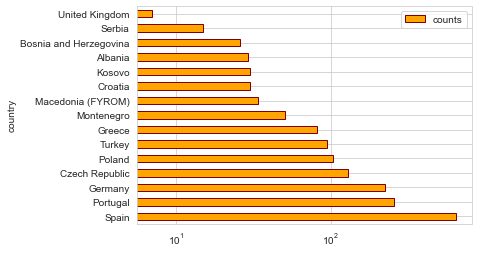

In [8]:
ax2 = df1.plot(kind='barh', color='orange',edgecolor='maroon')
ax2.set_xscale('log')

,counts
city,
Barcelona,632
Lisbon,158
Tübingen,131
Prague,97
Istanbul,94
Athens,67
Porto,58
Krakow,58
Freiburg,54


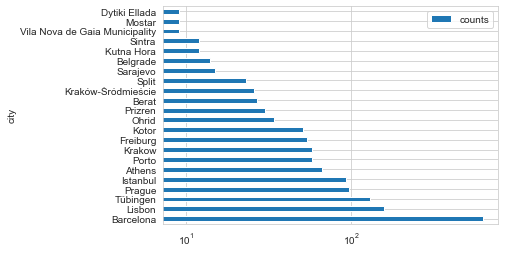

In [9]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

# As there are so many cities, only a selection of cities with a high number of visits is selected to plot. 
# Or is there a better solution?
df2 = df.city.value_counts().rename_axis('city').to_frame('counts')
df3= df2[df2['counts']>6]
display(df3)

ax = df3.plot(kind='barh')
ax.set_xscale('log')

## Next: scatter plots as simple maps

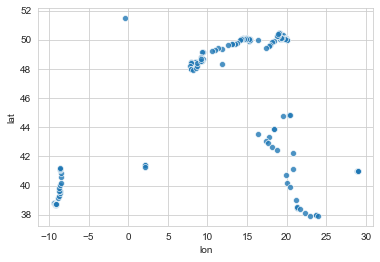

In [10]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 
sns.scatterplot(data=rs, x='lon', y='lat',alpha=0.8)
plt.show()

## Line charts, with annotation

In [11]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

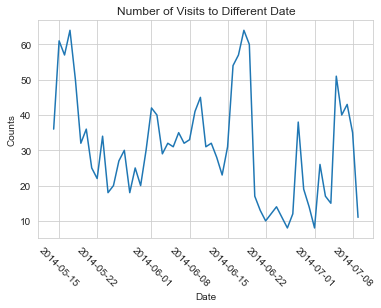

In [87]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

countdata2 = countdata.rename_axis('date').reset_index(name='counts')

sns.lineplot(data=countdata2, x="date", y="counts")

plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Number of Visits to Different Date")

plt.xticks(rotation = -45)

plt.show()

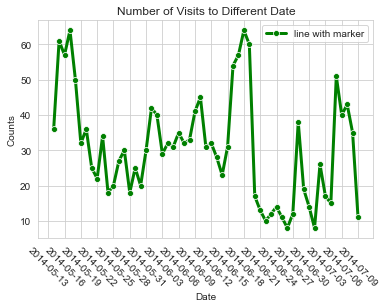

In [32]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

from matplotlib.pyplot import MultipleLocator

countdata3 = countdata.rename_axis('date').reset_index(name='counts')

x = countdata3['date']
y = countdata3['counts']
ax = sns.lineplot(x, y, linewidth=3, color='green', marker='o', label='line with marker')

#ax = sns.lineplot(data=countdata3, x="date", y="counts", linewidth=3, color='green', marker='o', label='line with marker')

plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Number of Visits to Different Date")
plt.xticks(rotation = -45)

#Make the vertical tick marks 3 days apart instead of 5.
x_major_locator = MultipleLocator(3)
ax.xaxis.set_major_locator(x_major_locator)



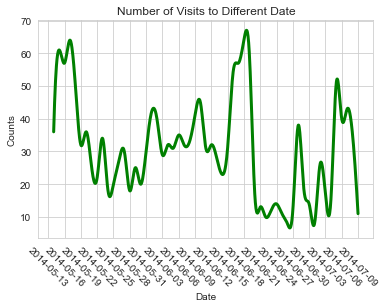

In [64]:
from datetime import datetime
import matplotlib.dates as dates
from scipy.interpolate import make_interp_spline
from matplotlib.pyplot import MultipleLocator

date_num = dates.date2num(x)

# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 1000) 
spl = make_interp_spline(date_num, y, k=3)
value_np_smooth = spl(date_num_smooth)

ax = sns.lineplot(dates.num2date(date_num_smooth), value_np_smooth, linewidth=3, color='green')

plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Number of Visits to Different Date")
plt.xticks(rotation = -45)

x_major_locator = MultipleLocator(3)
ax.xaxis.set_major_locator(x_major_locator)


## Pie charts

In [65]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

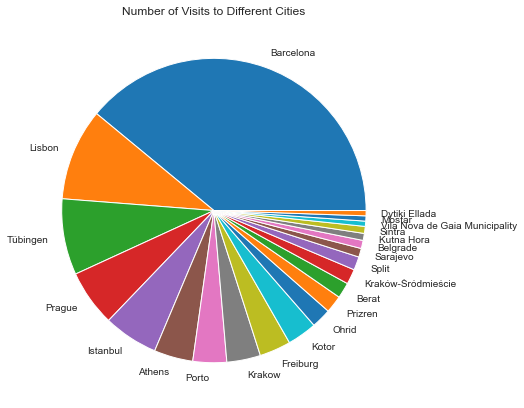

In [88]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

cities = df.city.value_counts().rename_axis('city').reset_index(name='counts')
cities2= cities[cities['counts']>6]
cities_label = cities2['city']
data = cities2['counts']

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cities_label)

plt.title("Number of Visits to Different Cities")

plt.show()